# TP n° 5 : frottement solide


> **Capacités mises en oeuvre**  
> - à l’aide d’un langage de programmation, simuler une situation mécanique dans laquelle intervient au moins un changement de mode de glissement; 
> - mesurer un coefficient de frottement.

Le langage utilisé est le langage python.

Vous passerez la moitié de la séance sur la partie numérique,
l'autre moitié sur la partie expérimentale (avec échange de matériel). 

## I - Dispositif

On considère le dispositif formé d'un solide de masse $m$, assimilé à son centre masse noté M, en mouvement sur un support S en translation rectiligne uniforme horizontale dans le référentiel terrestre ${\cal R}_t$ supposé galiléen avec le vecteur vitesse $\vec v_{S/{\cal R}_t}=\vec V=V\vec e_y$. Le solide est attaché à un dynamomètre, modélisé par un ressort hélicoïdal de raideur $k$ et solidaire du référentiel terrestre. Ce solide ne peut se mouvoir que parallèlement à l’axe horizontal O$y$. Le point O est la verticale de M quand la longueur $\ell$ du ressort est égale à sa longueur à vide $\ell_0$.

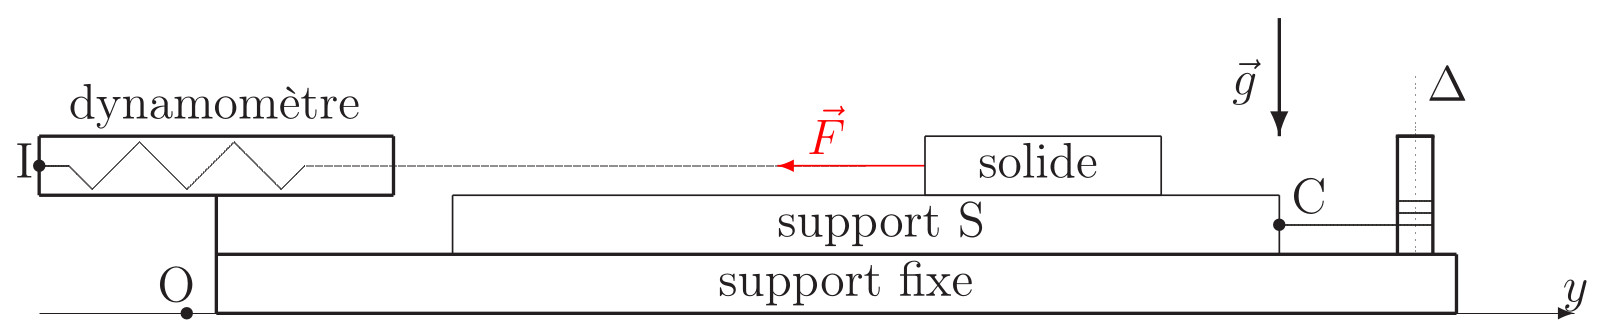

On se place dans le référentiel terrestre.  

Le solide y est soumis à son poids $\vec P$, à la réaction du support 
$R=N\vec e_z+T_y\vec e_y$ et à la force de rappel élastique 
$$\vec F=-k(\ell-\ell_0)\vec e_y=-ky\vec e_y\ .$$

On note le vecteur position du solide $\overrightarrow{OM}=y\vec e_y$, son vecteur vitesse $\vec v_{M/{\cal R}_t}=\dot y\vec e_y$ et son 
vecteur accélération  $\vec a_{M/{\cal R}_t}=\ddot y\vec e_y$. 

L’application du principe fondamental conduit aux équations suivantes :

$$N = mg\qquad\mbox{et}\qquad m\ddot y = T_y − ky\ .$$

La vitesse de glissement du solide par rapport au support s'écrit :

$$\vec v_g=\vec v_{M/{\cal R}_t}-\vec v_{S/{\cal R}_t}=(\dot y-V)\vec e_y\ .$$

**Phase d’adhérence**

La vitesse de glissement $\vec v_g$ étant nulle lors des phases d’adhérence,  on trouve $\dot y = V$ et $\ddot y = 0$ ; cette phase se poursuit tant que
$$|T_y| = k|y|< f_sN = f_s mg\  $$
où $f_s$ est le coefficient de frottement statique.

Elle s'achève à l'instant où $k|y|= f_s mg$ (en pratique $k|y|>f_s mg$), ce qui provoque l'amorce d'une phase de glissement.


**Phase de glissement**
 
Lors des phases de glissement, la force de frottement $\vec T=T_y\vec e_y$ est en sens opposé à la vitesse de glissement $\vec v_g$ : on note alors 

$$T_y=\epsilon |T_y|=\epsilon f_d N=\epsilon f_d mg\ ,$$
où $f_d$ est la coefficient de frottement dynamique et $\epsilon$ est 
un paramètre qui vaut :
* $+1$ si $ẏ < V$ ;
* $−1$ si $ẏ > V$ .

La position du système est régit par l’équation différentielle

$$m\ddot y + ky = \epsilon f_d mg\ .$$

Cette phase se poursuit tant que $\dot y \not= V$ (en pratique $\dot y < V$) et s'achève quand  $\dot y = V$ (en pratique $\dot y \geqslant V$) à condition que $k|y| \leqslant  f_s mg$ (sinon, il y a reprise du glissement).

## II - Etude numérique du mouvement 

### A : Schéma d'Euler vectoriel

Le mouvement est étudier à l'aide d'un schéma d'Euler vectoriel : on introduit le vecteur (tableau numpy)
$$ Y=\left(\begin{eqnarray*}y\\ \dot y\\ \end{eqnarray*}\right)\ ,$$
où
$$\frac{\mbox{d}Y}{\mbox{d}t}=F(Y)=\left(\begin{eqnarray*}\dot y\\ \ddot y\\ \end{eqnarray*}\right)\ .$$

La discrétisation de cette équation différentielle conduit à

$$\frac{Y_{n+1}-Y_n}{\mbox{d}t}=F(Y_n)\ ,$$

soit

$$Y_{n+1} = Y_n + \mbox{d}t \times F (Y_n )\  .$$

Le pas temporel de la résolution est noté dt : on pourra travailler avec $N = 10^5$ points pendant une durée totale de vingt secondes. Dans l’état initial, le système est adhérent en $y = 0$.

### B : Réalisation de la simulation

> 1. Commencer par importer les bibliothèques numpy, matplotlib et statistics en exécutant la cellule suivante.

In [16]:
#%%  Cellule n°1 : importations

import numpy as np
import matplotlib.pyplot as plt
import statistics


> 2. Dans la cellule suivant sont définis les principaux paramètres de la simulation. La compléter en précisant la position initiale *y0* et la vitesse initiale *v0*.

In [17]:
#%%  Cellule n°2 : définitions et initialisations

m=0.10      # masse de système (kg)
fs=0.5      # coefficient de frottement statique
fd=0.2      # coefficient de frottement dynamique
g=9.81      # intensité du champ de pesanteur (m/s2)
k=20        # raideur du ressort (N/m)
V=0.002     # vitesse du support (m/s)
y0=0        # position initiale (m)
v0=V        # vitesse initiale (m/s)

> 3. Dans la cellule suivante, rédiger la fonction **F** prenant *Yn* 
en paramètre et retournant F(*Yn*). On prendra bien soin de prendre en compte aussi bien les phases de glissement que les phases d’adhérence.

In [18]:
#%% Cellule n°3 : fonction F

def F(Yn):
    F=abs(k*Yn[0])
    if ((Yn[1]>=V) and (F< fs*m*g)):
        FYn=np.array([V,0])
    else :
        if Yn[1]>V :
            epsilon=-1
        else:
            epsilon=1
        FYn=np.array([Yn[1],-k/m*Yn[0]+epsilon*fd*g])
    return FYn



> 4. Dans la cellule n°4, rédiger la fonction **Euler** prenant *Y0* (*Y* initial) en paramètre et retournant trois listes contenant respectivement les instants $t_n$, les positions $y_n = y(t_n)$ et les vitesses $v_n = \dot y(t_n)$. On considèrera une durée d'évolution de vingt secondes.

In [22]:
#%% Cellule n°4 : méthode d'Euler vectorielle
  
def Euler(Y0) :    
    t0=0 
    N=100000 
    tf=80
    dt=(tf-t0)/N
    Y=Y0
    liste_t=[t0]
    liste_y=[Y0[0]]
    liste_v=[Y0[1]]
    for i in range(N):
        Y=Y+dt*F(Y)
        liste_t.append(liste_t[i]+dt)
        liste_y.append(Y[0])
        liste_v.append(Y[1])
    return liste_t, liste_y, liste_v

> 5. Dans la cellule n°5, compléter la fonction **Slipstick()** afin de faire tracer $y(t)$ et $ẏ(t)$. Les instructions déjà écrites permettent de faire afficher les deux tracés successivement.

In [23]:
#%% Cellule n° 5 : affichage des résultats
    
def slipstick():
    Y0=np.array([y0,v0]) 
    l_t,l_y,l_v = Euler(Y0)
    plt.clf()
    plt.plot(l_t,l_v,label='Vitesse')
    plt.ylabel('v (en m/s)')
    plt.xlabel('t (en s')
    plt.show()
    plt.clf()
    plt.plot(l_t,l_y,label='Position')
    plt.ylabel('y (en m)')
    plt.xlabel('t (en s')
    plt.show()
    
    
slipstick()

## III - Mesure d'un coefficient de frottement statique

A l’aide du matériel dont vous disposez, mesurer le coefficient de frottement statique $f_s$ entre la feutrine et le liège ou bien entre l’acier et la feutrine. Vous estimerez l’incertitude-type sur $f_s$ par une méthode de type A.

On n’oubliera pas de contrôler l’étalonnage du dynamomètre (gradué en décinewton - dN), et d’estimer les corrections à apporter si nécessaire.

L'exploitation des données est à mener en langage python.

In [1]:
m=np.array([0, 10, 20, 50, 100, 150 ])+95
F=np.array([7.5, 8,9,11.5, 14,19.5])
f=100*F/(m*g)
fm=statistics.mean(f)
em=statistics.pstdev(f)
um=em/np.sqrt(len(m))
print(fm,um)
plt.clf()
plt.plot(m*g/1000,F/10,'o')
plt.show()

Traceback (most recent call last):
  File "<basthon-input-1-fc042a4349f9>", line 1, in <module>
    m=np.array([0, 10, 20, 50, 100, 150 ])+95
      ^^
NameError: name 'np' is not defined
